<a href="https://colab.research.google.com/github/nanangyudi/2020pds_d/blob/main/M_Naufal_Andika_N_P_Projek_Akhir.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sentimen Analisis Review Hotel
Review hotel merupakan salah satu cara untuk menilai suatu layanan dan pengalaman yang diberikan kepada pengunjung. Review juga dapat digunakan sebagai dasar dalam melakukan peningkatan pelayanan pada suatu hotel. Sentimen analisis ini digunakan untuk memprediksi apakah suatu review merupakan review yang baik ataukah buruk. Hal ini dapat dimanfaatkan oleh pihak hotel sebagai dasar untuk melakukan peningkatan pelayanan dan juga pengalaman yang didapatkan oleh pengunjung hotel.

# Data Collection & Assembly
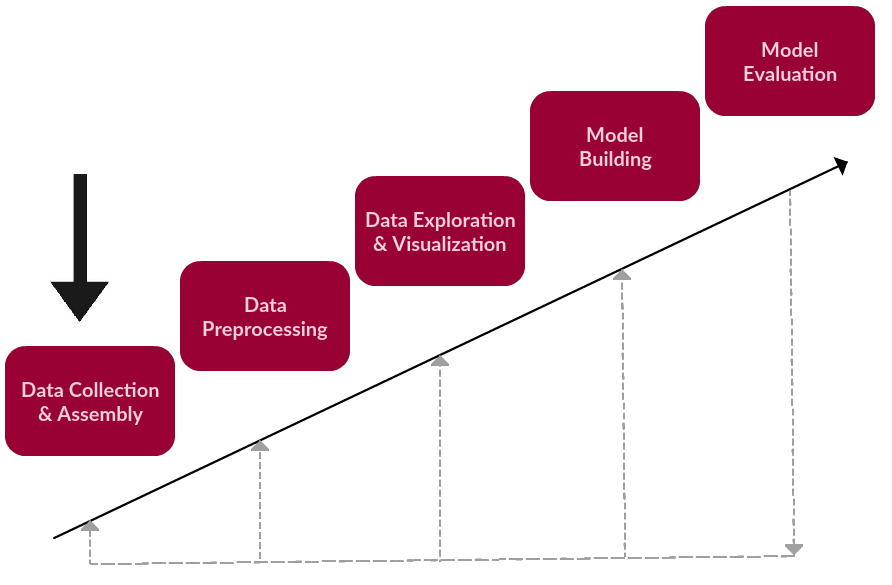  
Data yang digunakan merupakan data review dari 10 hotel paling mahal dan juga 10 hotel paling murah yang berada di London. Data ini didapatkan dari website kaggle dengan judul [Reviews of London-based hotels](https://www.kaggle.com/PromptCloudHQ/reviews-of-londonbased-hotels)

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from textblob.classifiers import NaiveBayesClassifier
from sklearn.metrics import confusion_matrix
import re
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

Menambahkan import untuk library yang digunakan.  
# Data Preprocessing
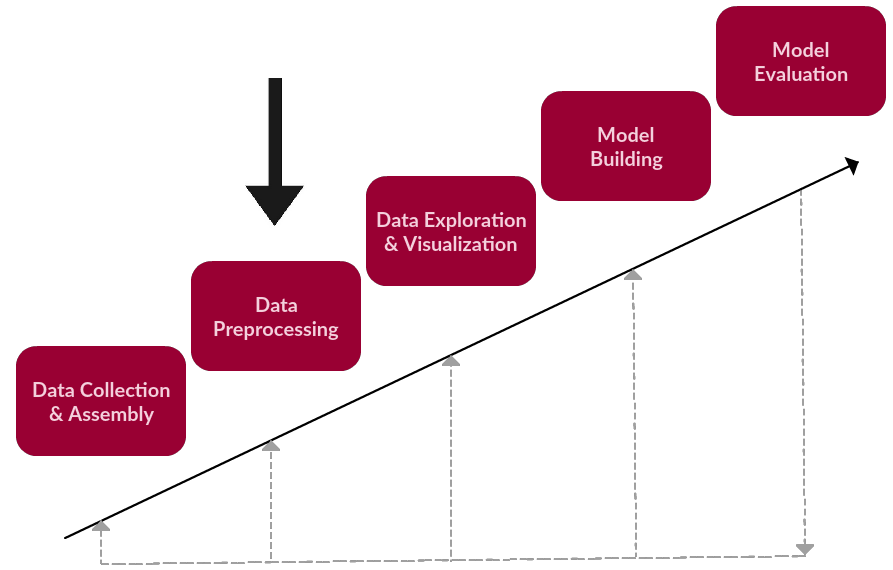  
Setelah ini akan memasuki tahap Data Preprocessing. Pada tahap tersebut akan dilakukan analisa bentuk data, lalu juga akan dilakukan data cleansing untuk data yang tidak sesuai.

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/naufalAndika/Pengantar-Data-Saintis/master/London_hotel_reviews.csv')
print(df.shape)
df.head()

(27330, 6)


,Property Name,Review Rating,Review Title,Review Text,Location Of The Reviewer,Date Of Review
0,Apex London Wall Hotel,5,Ottima qualità prezzo,Siamo stati a Londra per un week end ed abbiam...,"Casale Monferrato, Italy",10/20/2012
1,Corinthia Hotel London,5,"By far, my best hotel in the world",I had a pleasure of staying in this hotel for ...,"Savannah, Georgia",3/23/2016
2,The Savoy,5,First visit to the American Bar at the Savoy,A very lovely first visit to this iconic hotel...,London,7/30/2013
3,Rhodes Hotel,4,Nice stay,3 of us stayed at the Rhodes Hotel for 4 night...,"Maui, Hawaii",6/2/2012
4,The Savoy,5,Perfection,Form the moment we arrived until we left we ex...,"London, United Kingdom",11/24/2017


Dataset ini terdiri dari 27.330 baris data yang tiap baris data nya merupakan review terhadap suatu hotel.

In [ ]:
print(df.isna().sum(), end = '\n\n')
df[df.isnull().any(axis=1)].head()

Property Name                  0
Review Rating                  0
Review Title                   0
Review Text                    0
Location Of The Reviewer    3953
Date Of Review                 1
dtype: int64



,Property Name,Review Rating,Review Title,Review Text,Location Of The Reviewer,Date Of Review
5,Corinthia Hotel London,1,Staff stole from me!!,Well I am no strange to London's 5star hotels ...,NaN,3/1/2013
24,Mondrian London at Sea Containers,5,"Fantastic nights stay, one of the best hotels ...",My partner and I found this hotel by chance an...,NaN,6/20/2015
34,Mondrian London at Sea Containers,5,Just as good second time around!,After an amazing experience the first time we ...,NaN,10/15/2015
37,The Rembrandt,5,Good Hotel - Great Area,Very good hotel in a lovely area. Handy to the...,NaN,11/4/2016
45,Apex London Wall Hotel,4,Eccellente,"In tutto, dalla struttura nuova in stile moder...",NaN,4/30/2013


Terlihat bahwa untuk kolom "Location Of The Reviewer" terdapat 3.953 baris data yang bernilai null, namun hal ini wajar karena tidak semua reviewer menyertakan lokasi nya ketika memberikan review. Namun ada satu baris data yang kolom "Date Of Review" nya bernilai null, maka data tersebut perlu dicek.

In [ ]:
df[df["Date Of Review"].isnull()]

,Property Name,Review Rating,Review Title,Review Text,Location Of The Reviewer,Date Of Review
6556,The Lanesborough,4,<U+0412> <U+043F><U+043E><U+0434><U+0440><U+04...,<U+041E><U+0442><U+0435><U+043B><U+044C> : | <...,NaN,NaN


Setelah dicek, ternyata pada data tersebut tidak hanya "Date Of Review" nya yang bernilai null, melainkan "Review Title" dan juga "Review Text" nya tidak dapat dibaca. Hal ini mungkin disebabkan oleh encoding yang tidak sesuai.

In [ ]:
print(len(df[df["Review Title"].str.contains("<U")]), 'review yang tidak dapat dibaca')

df[df['Review Title'].str.contains('<U')].head()

431 review yang tidak dapat dibaca


,Property Name,Review Rating,Review Title,Review Text,Location Of The Reviewer,Date Of Review
90,The Dorchester,5,<U+0391><U+03B3><U+03B3><U+03BB><U+03B9><U+03B...,e<U+03B9><U+03BD>a<U+03B9> e<U+03BD>a<U+03C2> ...,"Athens, Greece",7/18/2017
174,Corinthia Hotel London,5,<U+041B><U+0443><U+0447><U+0448><U+0438><U+043...,<U+0423><U+0440><U+043E><U+0432><U+0435><U+043...,Zurich,2/17/2016
178,"Mandarin Oriental Hyde Park, London",5,<U+512A><U+96C5><U+306A><U+6642><U+9593><U+304...,<U+5148><U+6708><U+3001><U+304A><U+98DF><U+4E8...,"Aichi Prefecture, Japan",11/20/2015
328,The Savoy,5,<U+C544><U+B984><U+B2F5><U+ACE0> <U+C6B0><U+C5...,<U+CE5C><U+C808><U+D558><U+ACE0> <U+C720><U+CF...,NaN,5/15/2017
364,45 Park Lane - Dorchester Collection,5,<U+041C><U+043E><U+0434><U+043D><U+044B><U+043...,<U+041E><U+0442><U+0435><U+043B><U+044C> <U+04...,"Moscow, Russia",9/1/2015


Terdapat 431 baris data yang tidak dapat dibaca, maka data tersebut harus dibersihkan agar analisis dapat dilakukan dengan lebih baik.

In [ ]:
df = df[df['Review Title'].str.contains('<U') == False]

Disini baris data yang tidak dapat dibaca dihilangkan.

In [ ]:
print(df.shape)
df.head()

(26899, 6)


,Property Name,Review Rating,Review Title,Review Text,Location Of The Reviewer,Date Of Review
0,Apex London Wall Hotel,5,Ottima qualità prezzo,Siamo stati a Londra per un week end ed abbiam...,"Casale Monferrato, Italy",10/20/2012
1,Corinthia Hotel London,5,"By far, my best hotel in the world",I had a pleasure of staying in this hotel for ...,"Savannah, Georgia",3/23/2016
2,The Savoy,5,First visit to the American Bar at the Savoy,A very lovely first visit to this iconic hotel...,London,7/30/2013
3,Rhodes Hotel,4,Nice stay,3 of us stayed at the Rhodes Hotel for 4 night...,"Maui, Hawaii",6/2/2012
4,The Savoy,5,Perfection,Form the moment we arrived until we left we ex...,"London, United Kingdom",11/24/2017


Setelah dihilangkan menghasilkan sisa 26.899 baris data yang dapat dianalsis. 

# Data Exploration & Vizualisation
   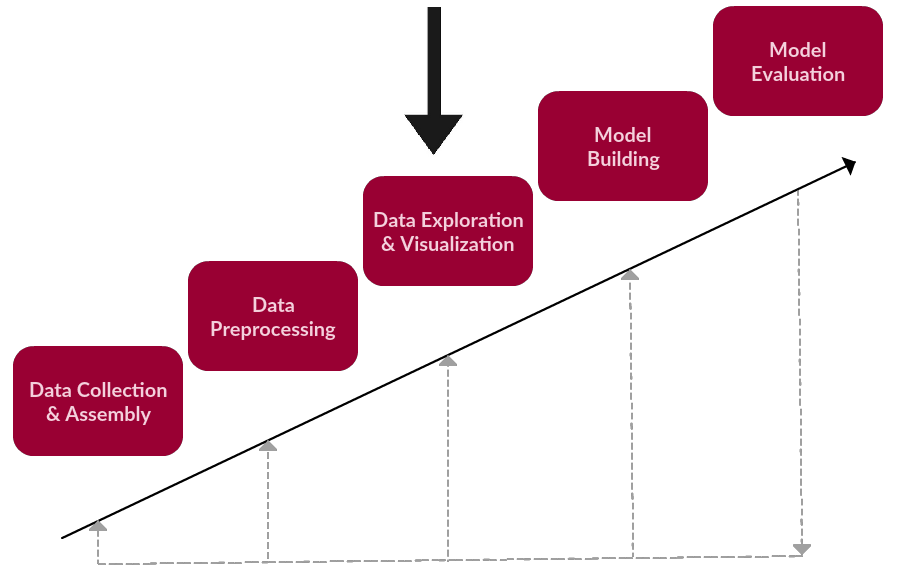  
   Setelah ini dapat dilanjutkan ke process Data Exploration & Visualization.

[Text(0, 0, 'The Savoy'),
 Text(0, 0, 'Mondrian London at Sea Containers'),
 Text(0, 0, 'The Rembrandt'),
 Text(0, 0, 'Corinthia Hotel London'),
 Text(0, 0, 'Apex London Wall Hotel'),
 Text(0, 0, 'The Dorchester'),
 Text(0, 0, 'Rhodes Hotel'),
 Text(0, 0, 'Hotel Xenia, Autograph Collection'),
 Text(0, 0, 'Ridgemount Hotel'),
 Text(0, 0, 'Mandarin Oriental Hyde Park, London'),
 Text(0, 0, 'Bulgari Hotel, London'),
 Text(0, 0, 'The Wellesley Knightsbridge, a Luxury Collection Hotel, London'),
 Text(0, 0, 'The Lanesborough'),
 Text(0, 0, 'London Guest House'),
 Text(0, 0, 'Newham Hotel'),
 Text(0, 0, 'A To Z Hotel'),
 Text(0, 0, '45 Park Lane - Dorchester Collection'),
 Text(0, 0, 'Hartley Hotel'),
 Text(0, 0, 'Marble Arch Hotel'),
 Text(0, 0, 'City View Hotel')]

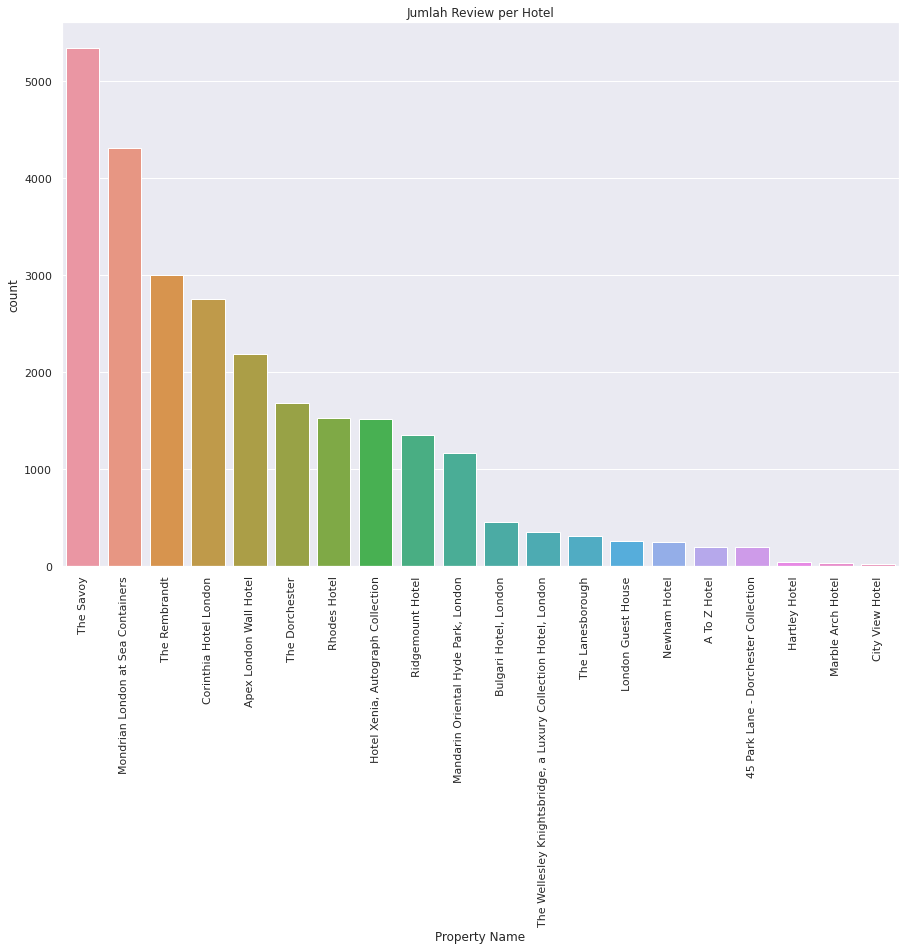

In [ ]:
df = df.fillna('NA')
sns.set(rc={'figure.figsize':(15,10)})
grid = sb.countplot(x = 'Property Name', data = df, order = df['Property Name'].value_counts().index)
grid.set_title('Jumlah Review per Hotel')
grid.set_xticklabels(grid.get_xticklabels(), rotation=90)

Text(0.5, 1.0, 'Jumlah Rating')

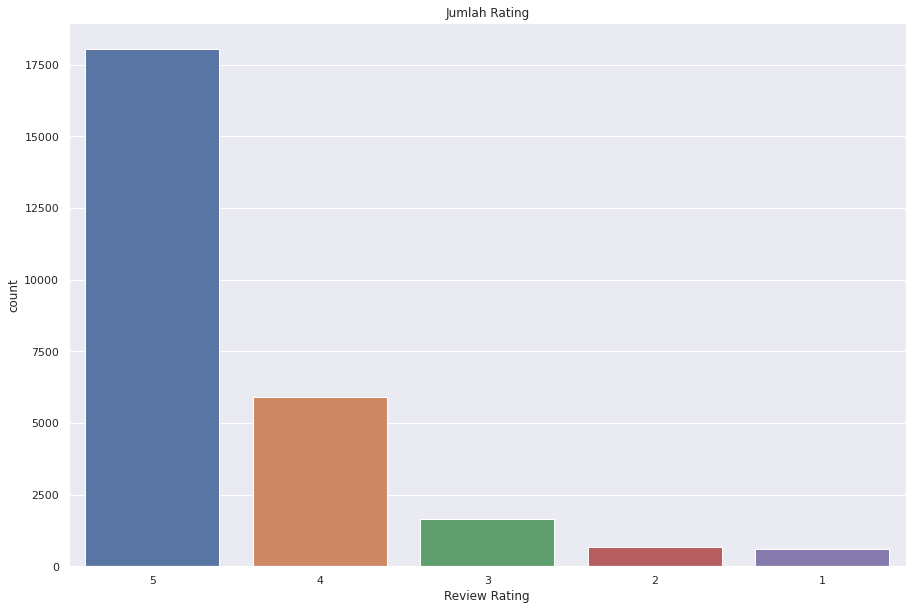

In [ ]:
grid = sb.countplot(x = 'Review Rating', data = df, order = df['Review Rating'].value_counts().index)
grid.set_title('Jumlah Rating')

Dua grafik diatas menunjukkan hotel yang telah diurut kan berdasarkan jumlah review yang didapat dan grafik jumlah rating terbanyak dari review. Hotel yang paling banyak menerima review adalah Hotel The Savoy dan rating paling banyak dari review adalah 5.  
Hotel The Savoy menerima review paling banyak, namun apakah Hotel The Savoy memiliki review paling bagus diantara hotel lain ? Hal ini dapat dicari tahu melalui grafik rata-rata review dibawah.

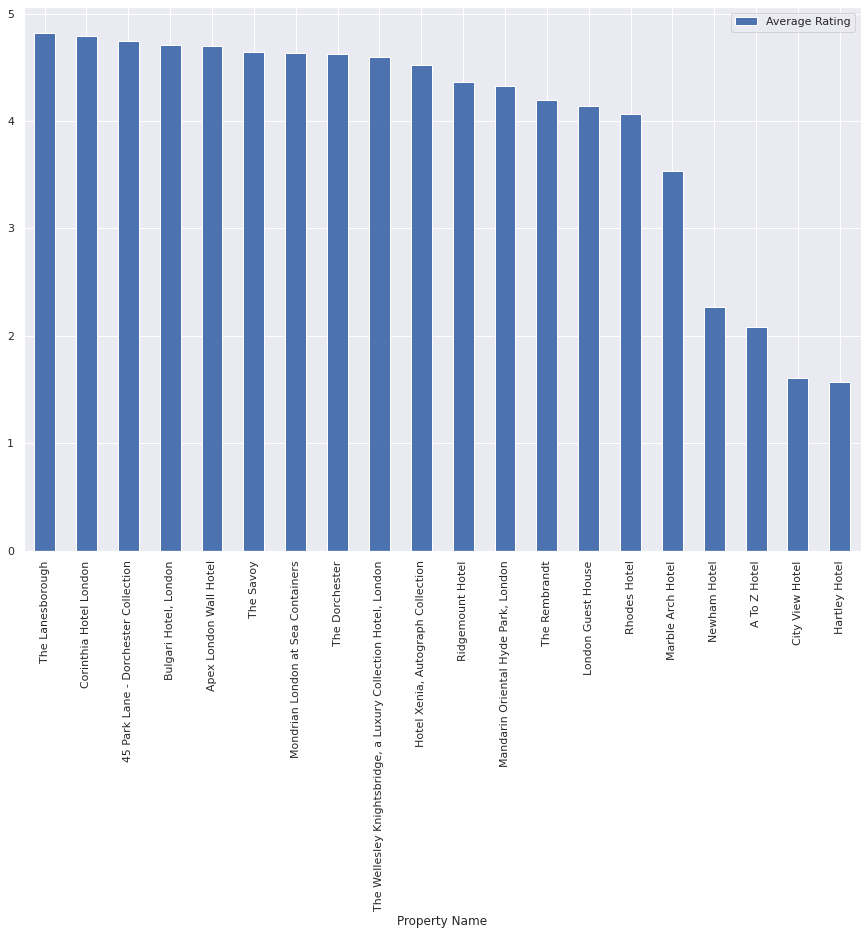

In [ ]:
average_df = pd.DataFrame(columns = ['Property Name', 'Average Rating'])
count = 0
for i in df['Property Name'].unique():
    average_rating = sum(df['Review Rating'][df['Property Name'] == i]) / sum(df['Property Name'] == i)
    average_df.loc[count] = [i, average_rating]
    count += 1 
average_df = average_df.sort_values('Average Rating', ascending = False)
average_df.plot(kind = 'bar', x = 'Property Name')

Visualisasi terhadap rata-rata review menunjukkan bahwa hotel dengan review terbaik adalah Hotel The Lanesborough. Selanjutnya akan divisualisasikan lokasi reviewer pada data ini.

[Text(0, 0, 'United Kingdom'),
 Text(0, 0, 'NA'),
 Text(0, 0, 'Italy'),
 Text(0, 0, 'California'),
 Text(0, 0, 'Australia'),
 Text(0, 0, 'France'),
 Text(0, 0, 'New York'),
 Text(0, 0, 'London'),
 Text(0, 0, 'Canada'),
 Text(0, 0, 'Germany'),
 Text(0, 0, 'Switzerland'),
 Text(0, 0, 'UK'),
 Text(0, 0, 'Spain'),
 Text(0, 0, 'Florida'),
 Text(0, 0, 'Texas'),
 Text(0, 0, 'Ireland'),
 Text(0, 0, 'England'),
 Text(0, 0, 'Sweden'),
 Text(0, 0, 'Belgium'),
 Text(0, 0, 'The Netherlands')]

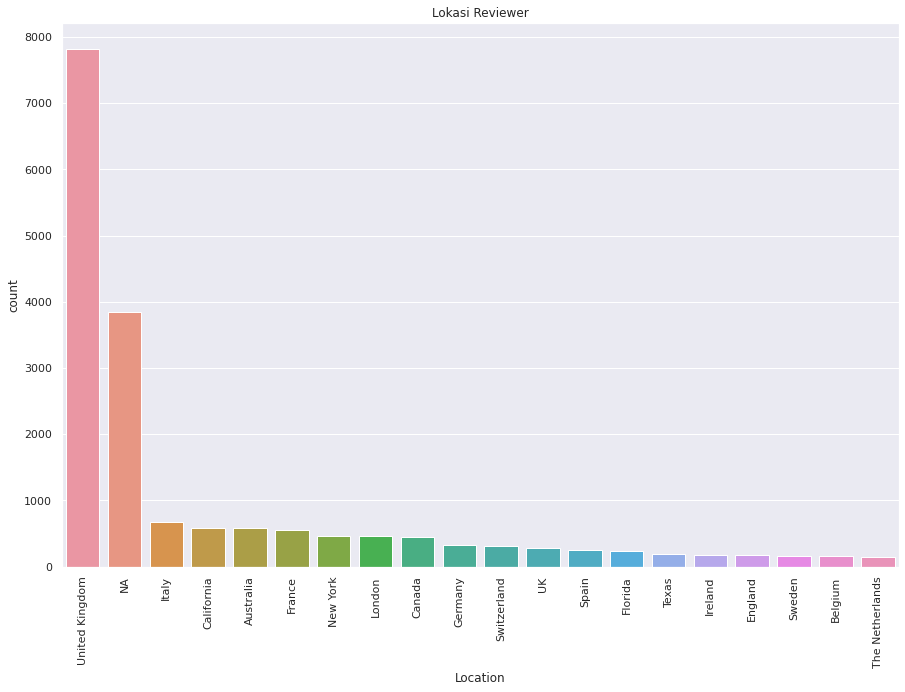

In [ ]:
locations = []
for i in df['Location Of The Reviewer']:
    if ", " not in i:
        locations.append(i)
    else:
        locations.append(i.rsplit(", ", 1)[1])
df['Location'] = locations

grid = sb.countplot(x = 'Location', data = df, order = df['Location'].value_counts().iloc[:20].index)
grid.set_title('Lokasi Reviewer')
grid.set_xticklabels(grid.get_xticklabels(), rotation=90)

Dari hasil visualisasi diatas, lokasi reviewer paling banyak adalah di United Kingdom, hal ini dikarenakan hotel yang direview adalah hotel di London. Selanjutnya adalah visualisasi jumlah review per tahun.

[Text(0, 0, '2016'),
 Text(0, 0, '2015'),
 Text(0, 0, '2017'),
 Text(0, 0, '2014'),
 Text(0, 0, '2013'),
 Text(0, 0, '2018'),
 Text(0, 0, '2012'),
 Text(0, 0, '2011'),
 Text(0, 0, '2010'),
 Text(0, 0, '2009'),
 Text(0, 0, '2007'),
 Text(0, 0, '2008'),
 Text(0, 0, '2006'),
 Text(0, 0, '2005'),
 Text(0, 0, '2004'),
 Text(0, 0, '2003'),
 Text(0, 0, '2002')]

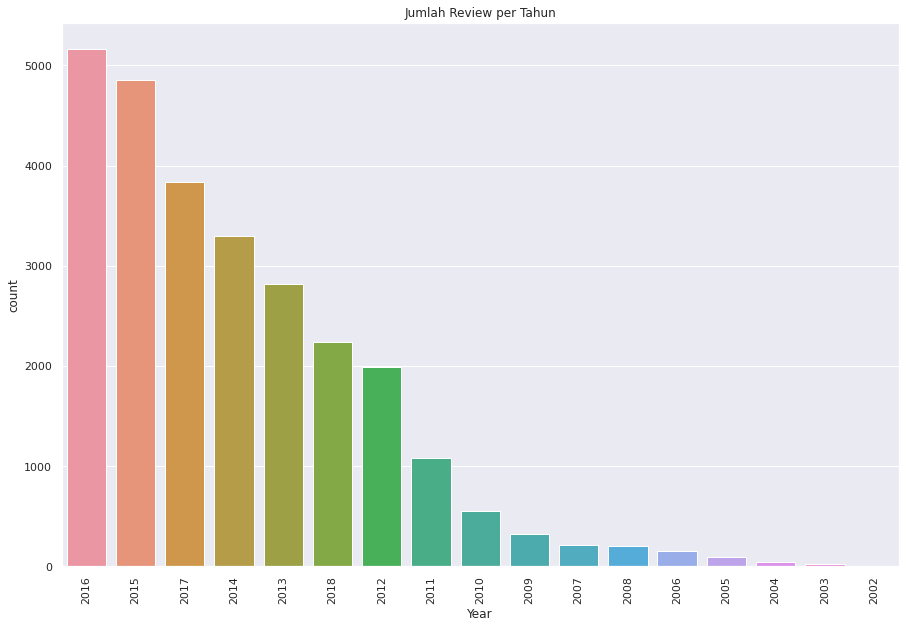

In [ ]:
years = []
for i in df['Date Of Review']:
    years.append(i[-4:])

df['Year'] = years
grid = sb.countplot(x = 'Year', data = df, order = df['Year'].value_counts().index)
grid.set_title('Jumlah Review per Tahun')
grid.set_xticklabels(grid.get_xticklabels(), rotation=90)

# Model Building
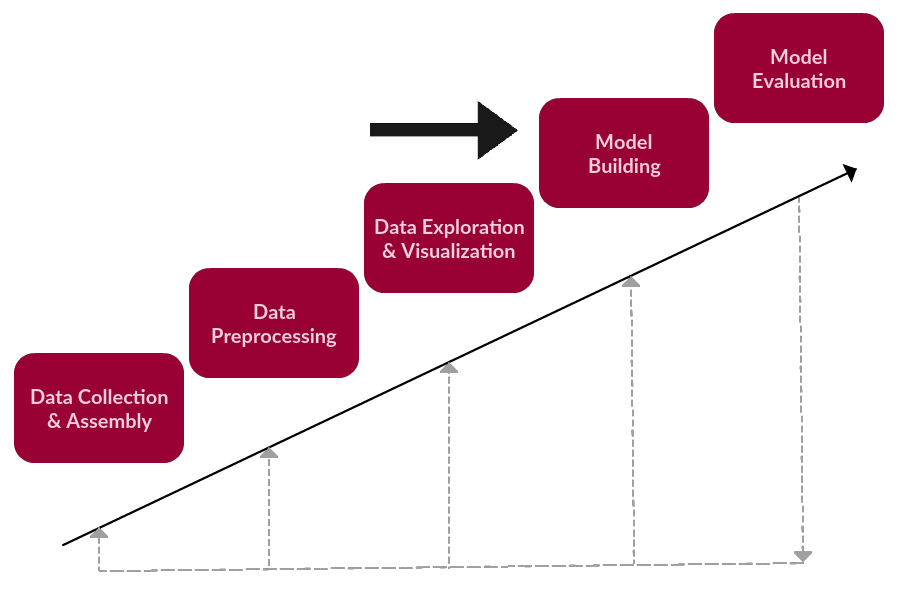
Setelah melakukan pembersihan data dan telah mengeksplorasi data, maka sekarang dilakukan pembuatan model untuk sentimen analisis. Pada sentimen analisis ini akan memprediksi apakah suatu review adalah review yang baik atau buruk. Pada penelitian ini, suatu review dikatakan review yang baik jika memiliki rating lebih dari 4, review yang memiliki rating kurang dari 4 dianggap merupakan review yang buruk.

In [ ]:
df['Complete Review'] = df['Review Title'] + ' ' + df['Review Text']
df.loc[df['Review Rating'] > 4, 'Good Review'] = 1
df.loc[df['Review Rating'] <= 4, 'Good Review'] = 0

print(sum(df['Good Review'] == 1) / len(df['Good Review']) * 100, ' persen review adalah review yang baik.')

67.1251719394773  persen review adalah review yang baik.


# Model Evaluation
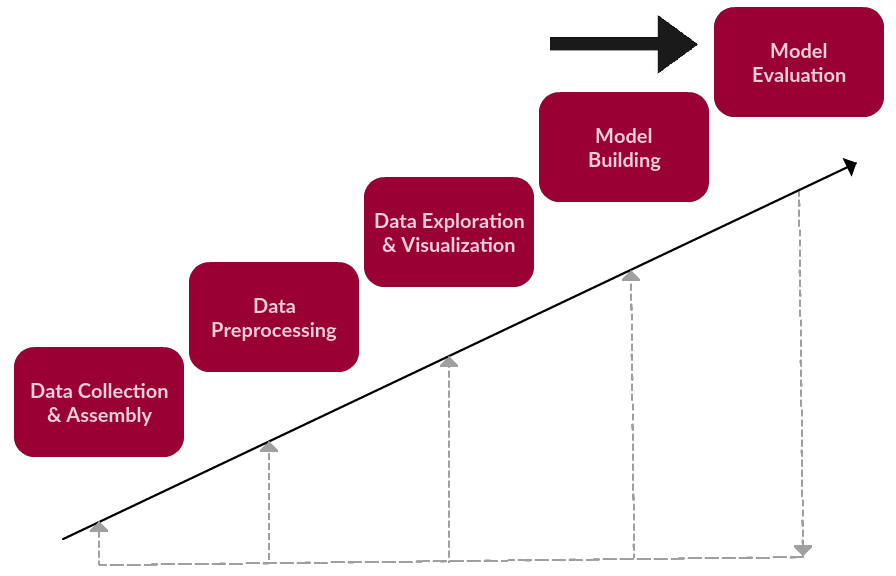

Setelah membuat model, selanjutnya adalah melakukan evaluasi pada model tersebut. Pada penelitian ini 80% akan menjadi data train dan 20% akan menjadi data test.

In [ ]:
data = np.random.rand(len(df)) < 0.8
train = df[data]
test = df[~data]

Sebelum melakukan evaluasi model, tanda baca perlu di hilangkan dari review. Karena yang berpengaruh terhadap review hanya kata-kata nya saja, maka tanda bacanya dapat di hilangkan. Disini akan memanfaatkan regex untuk melakukan replace.

In [ ]:
REPLACE_NO_SPACE = re.compile("(\.)|(\;)|(\:)|(\!)|(\')|(\?)|(\,)|(\")|(\|)|(\()|(\))|(\[)|(\])")
REPLACE_WITH_SPACE = re.compile("(<br\s*/><br\s*/>)|(\-)|(\/)")

def preprocess_reviews(reviews):
    reviews = [REPLACE_NO_SPACE.sub("", line.lower()) for line in reviews]
    reviews = [REPLACE_WITH_SPACE.sub(" ", line) for line in reviews]
    
    return reviews

reviews_train_clean = preprocess_reviews(train['Complete Review'])
reviews_test_clean = preprocess_reviews(test['Complete Review'])

Selanjutnya adalah *one hot encoding*, dimana setiap review nya akan dirubah menjadi matrix kata yang berisi 0 dan 1. Angka 1 berarti bahwa kata tersebut tercantum pada review, dan angka 0 berarti kata tersebut tidak tercantum pada review. Hal ini akan digunakan pada algoritma regresi logistik.

In [ ]:
cv = CountVectorizer(binary=True)
cv.fit(reviews_train_clean)

X_train = cv.transform(reviews_train_clean)
X_test = cv.transform(reviews_test_clean)

Terakhir adalah melakukan training model. Grafik pada eksplorasi data menunjukkan lebih dari 60% review memiliki rating 5, maka harapannya adalah model akan menghasilkan akurasi lebih dari 60%.

In [ ]:
target_train = train['Good Review']
target_test = test['Good Review']

model = LogisticRegression()
model.fit(X_train, target_train)
accuracy = accuracy_score(target_test, model.predict(X_test))
accuracy *= 100
print ("Akurasi: %s persen" % accuracy)

Akurasi: 80.89019679970572 persen


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Setelah di tes, model tersebut menghasilkan akurasi 80%, lebih dari ekspektasi yaitu 60%.